Load the data

In [15]:
import pandas as pd

data = pd.read_csv('../data/heart_2020_cleaned.csv')

Normalize variables

In [16]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = data.select_dtypes(include=['float64']).columns
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

Separate between objective and independent variables

In [17]:
char = data.drop(columns=['HeartDisease'])
obj = data['HeartDisease']

Divide the data between train and test data

In [18]:
from sklearn.model_selection import train_test_split

char_train, char_test, obj_train, obj_test = train_test_split(char, obj, test_size=0.2, random_state=42)


- K-nn model

In [19]:
from sklearn.neighbors import KNeighborsClassifier

k = 19
knn_model = KNeighborsClassifier(n_neighbors=k)

# Training of the model
knn_model.fit(char_train, obj_train)

# Evaluation of the model
predictions = knn_model.predict(char_test)


from sklearn.metrics import accuracy_score, recall_score, f1_score

accuracy = accuracy_score(obj_test, predictions)
recall = recall_score(obj_test, predictions)
f1 = f1_score(obj_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.76
Recall: 0.78
F1-Score: 0.77


Elbow Curve Validation Technique

For k = 1, Accuracy: 0.69
For k = 2, Accuracy: 0.67
For k = 3, Accuracy: 0.73
For k = 4, Accuracy: 0.71
For k = 5, Accuracy: 0.74
For k = 6, Accuracy: 0.73
For k = 7, Accuracy: 0.75
For k = 8, Accuracy: 0.74
For k = 9, Accuracy: 0.75
For k = 10, Accuracy: 0.74
For k = 11, Accuracy: 0.75
For k = 12, Accuracy: 0.75
For k = 13, Accuracy: 0.76
For k = 14, Accuracy: 0.75
For k = 15, Accuracy: 0.76
For k = 16, Accuracy: 0.75
For k = 17, Accuracy: 0.76
For k = 18, Accuracy: 0.75
For k = 19, Accuracy: 0.76
For k = 20, Accuracy: 0.75


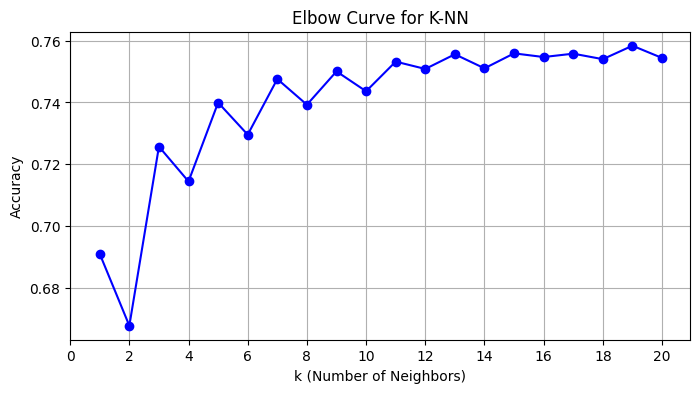

In [22]:
import matplotlib.pyplot as plt

k_values = range(1, 21)  
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(char_train, obj_train)
    predictions = knn_model.predict(char_test)
    accuracy = accuracy_score(obj_test, predictions)
    accuracies.append(accuracy)
    print(f'For k = {k}, Accuracy: {accuracy:.2f}')

plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('k (Number of Neighbors)')
plt.xticks(range(0, 21, 2))
plt.ylabel('Accuracy')
plt.title('Elbow Curve for K-NN')
plt.grid(True)
plt.show()